In [1]:
import sys
sys.path.insert(0, "..")

In [2]:
from golftracker import obj_tracking as ot

In [3]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

In [4]:
import numpy as np

In [5]:
img = np.zeros((100, 100, 3), dtype=np.uint8)

In [6]:
start_pt = [10, 20]
end_pt = [30, 40]
color = (255, 0, 0)
thickness = 2

tmp = cv2.rectangle(img, start_pt, end_pt, color, thickness=-1)

Rectangle=[(10, 20, 30, 40)]
Trackerbb=[(8, 18, 40, 60)]


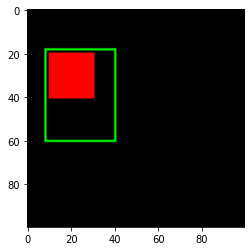

Rectangle=[(15, 25, 35, 45)]
Trackerbb=[(13, 23, 45, 65)]


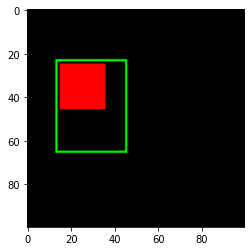

Rectangle=[(20, 30, 40, 50)]
Trackerbb=[(18, 28, 50, 70)]


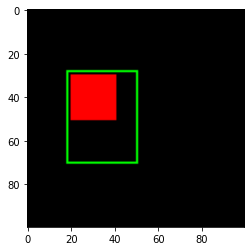

Rectangle=[(25, 35, 45, 55)]
Trackerbb=[(23, 33, 55, 75)]


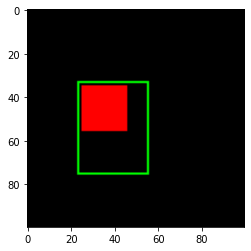

Rectangle=[(30, 40, 50, 60)]
Trackerbb=[(28, 38, 60, 80)]


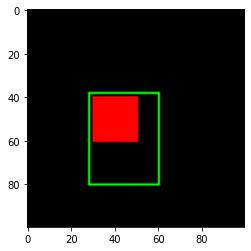

Rectangle=[(35, 45, 55, 65)]
Trackerbb=[(33, 43, 65, 85)]


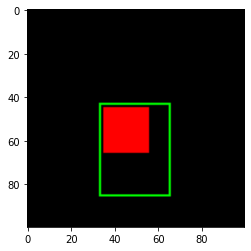

Rectangle=[(40, 50, 60, 70)]
Trackerbb=[(38, 48, 70, 90)]


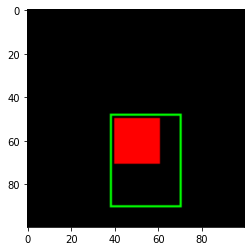

Rectangle=[(45, 55, 65, 75)]
Trackerbb=[(43, 53, 75, 95)]


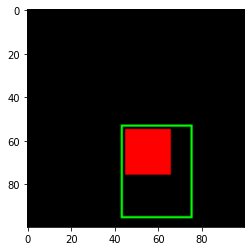

Rectangle=[(50, 60, 70, 80)]
Trackerbb=[(48, 58, 80, 100)]


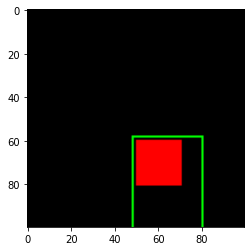

Rectangle=[(55, 65, 75, 85)]
Trackerbb=[(53, 63, 85, 100)]


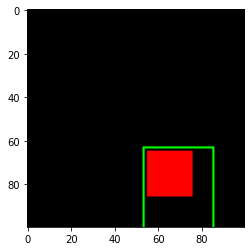

Rectangle=[(60, 70, 80, 90)]
Trackerbb=[(58, 68, 90, 100)]


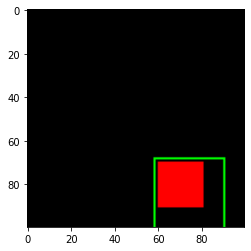

Rectangle=[(65, 75, 85, 95)]
Trackerbb=[(63, 73, 95, 100)]


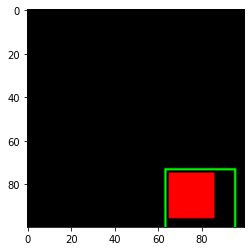

Rectangle=[(70, 80, 90, 100)]
TRACKING FAILED
Rectangle=[(75, 85, 95, 105)]
TRACKING FAILED
Rectangle=[(80, 90, 100, 110)]
TRACKING FAILED
Rectangle=[(85, 95, 105, 115)]
TRACKING FAILED
Rectangle=[(90, 100, 110, 120)]
TRACKING FAILED
Rectangle=[(95, 105, 115, 125)]
TRACKING FAILED
Rectangle=[(100, 110, 120, 130)]
TRACKING FAILED
Rectangle=[(105, 115, 125, 135)]
TRACKING FAILED


In [7]:
#tracker = cv2.legacy.TrackerMedianFlow_create()
tracker = cv2.legacy.TrackerKCF_create()
tracker.init(img, [start_pt[0] -2 , start_pt[1] -2, end_pt[0] + 2, end_pt[1] + 2])
incr = 5

for _ in range(20):
    img = np.zeros((100, 100, 3), dtype=np.uint8)
    tmp = cv2.rectangle(img, start_pt, end_pt, color, thickness=-1)
    print(f"Rectangle=[({start_pt[0]}, {start_pt[1]}, {end_pt[0]}, {end_pt[1]})]")
    
    ok, bbox = tracker.update(img)
    if ok:
        p1 = (int(bbox[0]), int(bbox[1]))
        p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
        tmp = cv2.rectangle(img, p1, p2, (0, 255, 0), 1)
        print(f"Trackerbb=[({p1[0]}, {p1[1]}, {p2[0]}, {p2[1]})]")
        
        plt.imshow(img)
        plt.show()
    else:
        print("TRACKING FAILED")
        
    # Move the rectangle.
    start_pt[0] += incr
    start_pt[1] += incr
    end_pt[0] += incr
    end_pt[1] += incr
    
   
    

Show Default Image 

Rectangle=[(10, 20, 30, 40)]
Trackerbb=[(8, 18, 40, 60)]


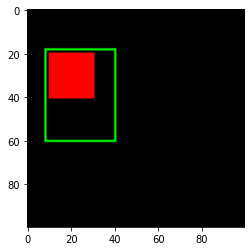

Rectangle=[(15, 25, 35, 45)]
Trackerbb=[(13, 23, 45, 65)]


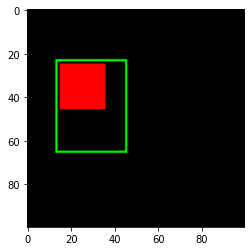

Rectangle=[(20, 30, 40, 50)]
Trackerbb=[(18, 28, 50, 70)]


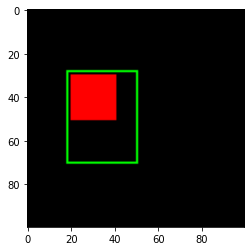

Rectangle=[(25, 35, 45, 55)]
Trackerbb=[(23, 33, 55, 75)]


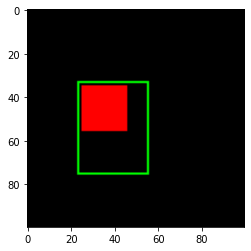

Rectangle=[(30, 40, 50, 60)]
Trackerbb=[(28, 38, 60, 80)]


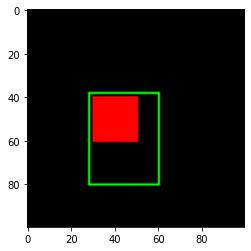

Rectangle=[(35, 45, 55, 65)]
Trackerbb=[(33, 43, 65, 85)]


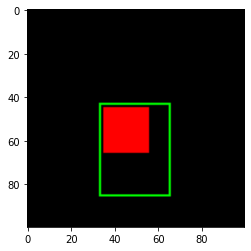

Rectangle=[(40, 50, 60, 70)]
Trackerbb=[(38, 48, 70, 90)]


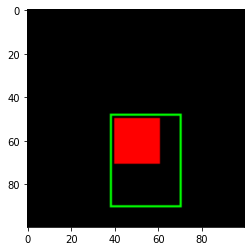

Rectangle=[(45, 55, 65, 75)]
Trackerbb=[(43, 53, 75, 95)]


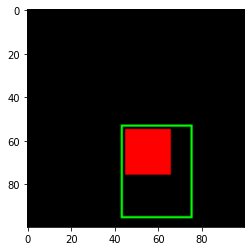

Rectangle=[(50, 60, 70, 80)]
Trackerbb=[(48, 58, 80, 100)]


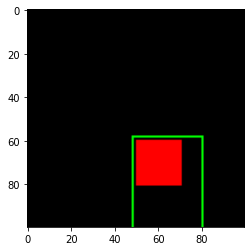

Rectangle=[(55, 65, 75, 85)]
Trackerbb=[(53, 63, 85, 100)]


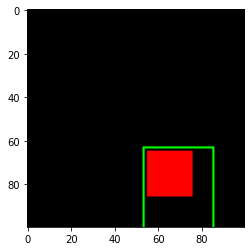

Rectangle=[(60, 70, 80, 90)]
Trackerbb=[(58, 68, 90, 100)]


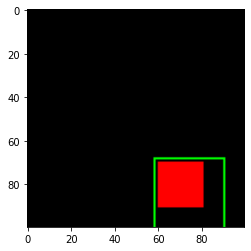

Rectangle=[(65, 75, 85, 95)]
Trackerbb=[(63, 73, 95, 100)]


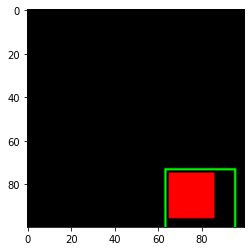

Rectangle=[(70, 80, 90, 100)]


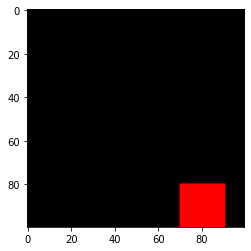

Rectangle=[(75, 85, 95, 105)]


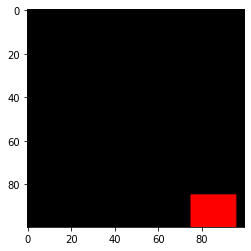

Rectangle=[(80, 90, 100, 110)]


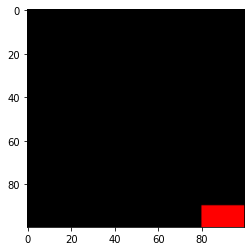

Rectangle=[(85, 95, 105, 115)]


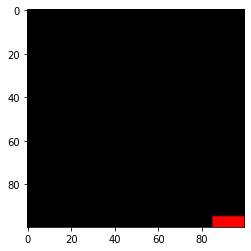

Rectangle=[(90, 100, 110, 120)]


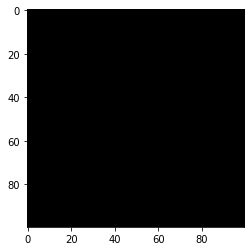

Rectangle=[(95, 105, 115, 125)]


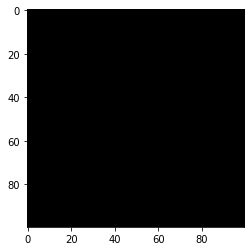

Rectangle=[(100, 110, 120, 130)]


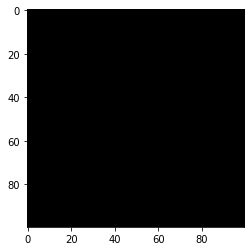

Rectangle=[(105, 115, 125, 135)]


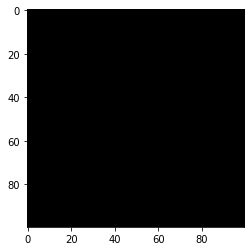

In [8]:
#tracker = cv2.legacy.TrackerMedianFlow_create()
start_pt = [10, 20]
end_pt = [30, 40]
color = (255, 0, 0)
thickness = 2

tracker = ot.ObjTracking("kcf")
tracker.add(img, [start_pt[0] -2 , start_pt[1] -2, end_pt[0] + 2, end_pt[1] + 2])
incr = 5

for _ in range(20):
    img = np.zeros((100, 100, 3), dtype=np.uint8)
    tmp = cv2.rectangle(img, start_pt, end_pt, color, thickness=-1)
    print(f"Rectangle=[({start_pt[0]}, {start_pt[1]}, {end_pt[0]}, {end_pt[1]})]")
    
    bboxes = tracker.update(img)
    if bboxes:
        bbox = bboxes[0]
        p1 = (int(bbox[0]), int(bbox[1]))
        p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
        tmp = cv2.rectangle(img, p1, p2, (0, 255, 0), 1)
        print(f"Trackerbb=[({p1[0]}, {p1[1]}, {p2[0]}, {p2[1]})]")
        
    plt.imshow(img)
    plt.show()
   
        
    # Move the rectangle.
    start_pt[0] += incr
    start_pt[1] += incr
    end_pt[0] += incr
    end_pt[1] += incr
    
   
    